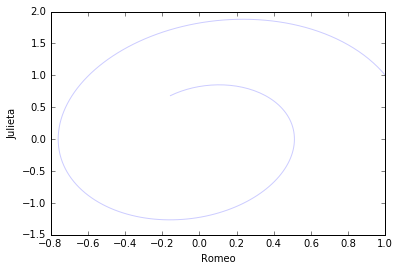

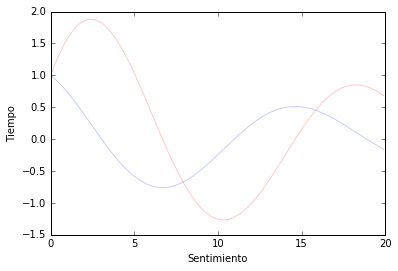

In [4]:
import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *
%matplotlib inline


a, b = 0.0, -0.2       # Coeficientes para la ecuación de Romeo
c, d = 0.8, -0.1         # Coeficientes para la ecuación de Julieta

def loveeq(state, t):
    r, j = state
    dr = a*r + b*j
    dj = c*r + d*j
    return [dr, dj]

t = arange(0, 20, 0.1)
#t = n.arange(0.0, 10, 0.01)
init_state = [1, 1]
state = odeint(loveeq, init_state, t)

fig = figure()
xlabel('Romeo')
ylabel('Julieta')
plot(state[:, 0], state[:, 1], 'b-', alpha=0.2)

def animate(i):
    plot(state[0:i, 0], state[0:i, 1], 'b-')


#ani = animation.FuncAnimation(fig, animate, interval=1)
show()


fig2 = figure()
xlabel('Sentimiento')
ylabel('Tiempo')
plot(t, state[:, 0], 'b-', alpha=0.2)
plot(t, state[:, 1],  'r-', alpha=0.2)

def animate2(i):
    plot(t[0:i], state[0:i, 0], 'b-')
    plot(t[0:i], state[0:i, 1], 'r-')

ani1 = animation.FuncAnimation(fig2, animate2, interval=1)
show()

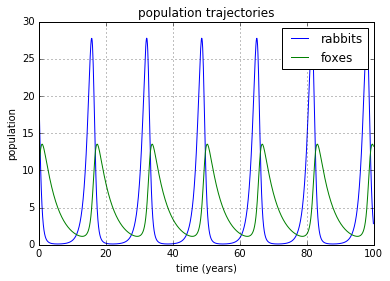

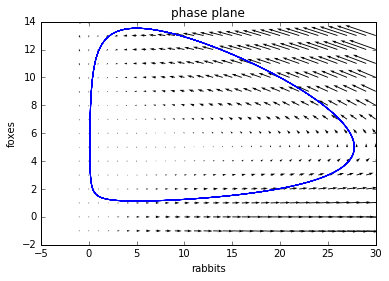

In [5]:
import numpy as n
import pylab as p
import scipy.integrate as integrate

def dr(r, f):
    return alpha*r - beta*r*f

def df(r, f):
    return gamma*r*f - delta*f

def derivs(state, t):
    """
    Map the state variable [rabbits, foxes] to the derivitives
    [deltar, deltaf] at time t
    """
    #print t, state
    r, f = state  # rabbits and foxes
    deltar = dr(r, f)  # change in rabbits
    deltaf = df(r, f) # change in foxes
    return deltar, deltaf

alpha, delta = 1, .25
beta, gamma = .2, .05

# the initial population of rabbits and foxes
r0 = 20
f0 = 10

t = n.arange(0.0, 100, 0.1)

y0 = [r0, f0]  # the initial [rabbits, foxes] state vector
y = integrate.odeint(derivs, y0, t)
r = y[:,0]  # extract the rabbits vector
f = y[:,1]  # extract the foxes vector

p.figure()
p.plot(t, r, label='rabbits')
p.plot(t, f, label='foxes')
p.xlabel('time (years)')
p.ylabel('population')
p.title('population trajectories')
p.grid()
p.legend()
p.savefig('lotka_volterra.png', dpi=150)
p.savefig('lotka_volterra.eps')


p.figure()
p.plot(r, f)
p.xlabel('rabbits')
p.ylabel('foxes')
p.title('phase plane')


# make a direction field plot with quiver
rmax = 1.1 * r.max()
fmax = 1.1 * f.max()
R, F = n.meshgrid(n.arange(-1, rmax), n.arange(-1, fmax))
dR = dr(R, F)
dF = df(R, F)
p.quiver(R, F, dR, dF)


#R, F = n.meshgrid(n.arange(-1, rmax, .1), n.arange(-1, fmax, .1))
#dR = dr(R, F)
#dF = df(R, F)

#p.contour(R, F, dR, levels=[0], linewidths=3, colors='black')
#p.contour(R, F, dF, levels=[0], linewidths=3, colors='black')
#p.ylabel('foxes')
#p.title('trajectory, direction field and null clines')

p.savefig('lotka_volterra_pplane.png', dpi=150)
p.savefig('lotka_volterra_pplane.eps')


p.show()